In [87]:
import pandas as pd #Вывести все колонки из DataFrame
df = pd.read_csv('data\TSLA.csv');
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [88]:
ds = df[0:388] # записываю в ds данные от начала до даты 2012-01-10, чтобы работать с ним.

In [89]:
ds

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
383,2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
384,2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
385,2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
386,2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


In [90]:
ds['Adj Close'].median() #Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

25.904999500000002

<AxesSubplot:>

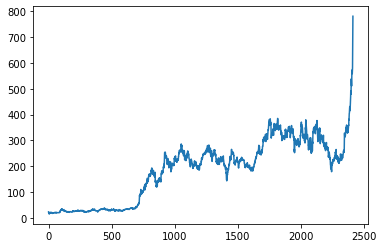

In [91]:
import matplotlib.pyplot as plt #Вывести график цены закрытия
df['Close'].plot()

In [92]:
import numpy as np

In [93]:
max = df['Open'].max()# максимум со столбца Open
print(max)

673.690002


In [94]:
min = df['Open'].min() #минимум со столбца Open
print(min) 

16.139999


In [95]:
df['Open'].apply(lambda x: (x - min) / (max - min)) #Нормализация Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.
#Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки. Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.
#Вот формула, которую часто применяют для нормализации значений одного столбца:где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.
#Примените эту формулу к столбцу Open (используйте метод apply).

0       0.004349
1       0.014676
2       0.013474
3       0.010433
4       0.005870
          ...   
2411    0.840012
2412    0.850962
2413    0.937237
2414    0.948764
2415    1.000000
Name: Open, Length: 2416, dtype: float64

In [96]:
#Что такое SMA (Simple Moving Average) с окном 12,15,30. Можно посмотреть внешние решения. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

In [97]:
#SMA 12 окон означает, что мы берём 12 данных и считаем среднее, потом начинаем со 2 числа и тоже берём 12 данных и считаем среднее и так далее. 15 окон = 15 данных, 30 окон = 30 данных. Покупать акции стоит, когда график начинает скольжение вверх с мин на макс, а продавать наоборот: когда идёт тенденция на спад, с макс на мин.

<AxesSubplot:>

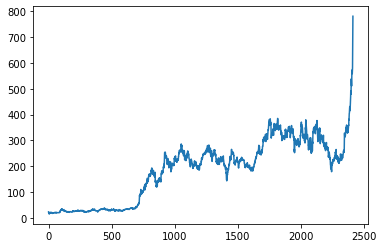

In [98]:
df['Close'].plot() #Построить график с ценой закрытия и посчитаным SMA 12,15,30/ график с ценой закрытия

<AxesSubplot:>

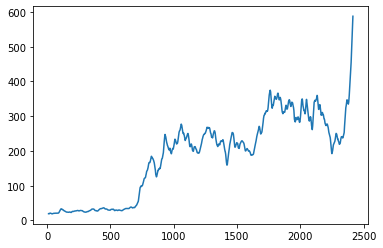

In [99]:
df['Close'].rolling(window =12).mean().plot() # график SMA 12

<AxesSubplot:>

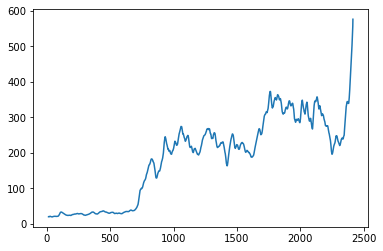

In [100]:
df['Close'].rolling(window =15).mean().plot() # график SMA 15

<AxesSubplot:>

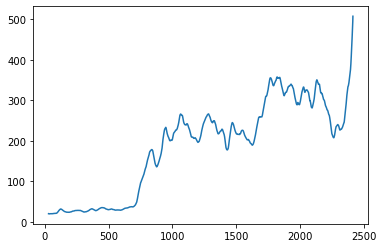

In [101]:
df['Close'].rolling(window =30).mean().plot() # график SMA 30